## **This is a Linear Regression Exercise that makes sure all assumptions of a Linear Model are followed.**

<br>

#### 1. Linearity: The predictors and the target variable have a linear relationship.
#### 2. No Endogeneity: The errors shouldn't be correlated with the target variable
#### 3. Normality of Residuals and Heteroscedasticity: Residuals should be approximately normally distributed.
#### Errors hould have low variance.
#### 4. No to minimal collinearity: Beware of features with high correlation since they mess up the internal calculation of the coefficients.
#### 5. Autocovariance or No serial correlation: Errors should be randomly positioned around the regression line.

<br>

### **References**:
#### I used the Wind Turbine Farm Data from the tidytuesday project.
#### Here's the link to know about more.
https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-06

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":(10, 10)})
pd.set_option("display.max_columns", None)

In [243]:
wind_turbines_raw = pd.read_csv("wind_turbines.csv")

In [244]:
wind_turbines_raw.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3073429,missing,missing,4960,CA,Kern County,6029,251 Wind,1987,194,18.43,Vestas,missing,95,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.360725,35.083778
1,3071522,missing,missing,4997,CA,Kern County,6029,251 Wind,1987,194,18.43,Vestas,missing,95,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.361168,35.081512
2,3073425,missing,missing,4957,CA,Kern County,6029,251 Wind,1987,194,18.43,Vestas,missing,95,-9999.0,-9999.0,-9999.0,-9999.0,2,3,1/1/2012,NAIP,-118.360420,35.084709
3,3071569,missing,missing,5023,CA,Kern County,6029,251 Wind,1987,194,18.43,Vestas,missing,95,-9999.0,-9999.0,-9999.0,-9999.0,2,3,7/31/2016,Digital Globe,-118.364029,35.079418
4,3005252,missing,missing,5768,CA,Kern County,6029,251 Wind,1987,194,18.43,Vestas,missing,95,-9999.0,-9999.0,-9999.0,-9999.0,2,3,11/23/2017,Digital Globe,-118.354286,35.085594


#### Replace missing values represented as -9999 to NaN

In [247]:
wind_processed = wind_turbines_raw.replace(-9999, np.nan)

In [248]:
# Select there features
wind_selections = wind_processed[["t_cap",
                "t_state",
                "p_year",
                "t_hh",
                "t_rd",
                "t_rsa",
                "t_ttlh",
                "t_conf_atr"]]


wind_selections.shape

(58185, 8)

#### Remove rows with missing values

In [250]:
print(wind_selections.dropna(axis = "rows").shape)
# rows were reduced from 58185 to 51548 (~13% less)

wind_selections = wind_selections.dropna(axis = "rows")
# Check if rows still have missing values
# No more missing values
print(wind_selections.isna().mean())

(51548, 8)
t_cap         0.0
t_state       0.0
p_year        0.0
t_hh          0.0
t_rd          0.0
t_rsa         0.0
t_ttlh        0.0
t_conf_atr    0.0
dtype: float64


## **Exploratory Data Analysis**

## Linearity

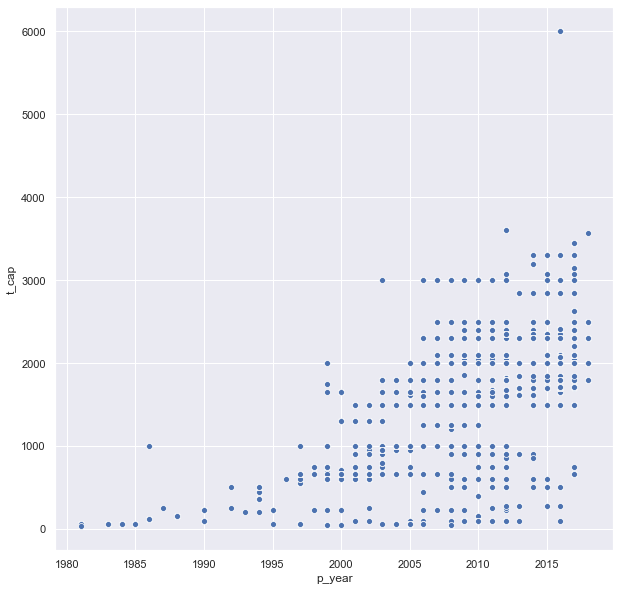

In [255]:
sns.scatterplot(x = "p_year", y = "t_cap", data = wind_selections)

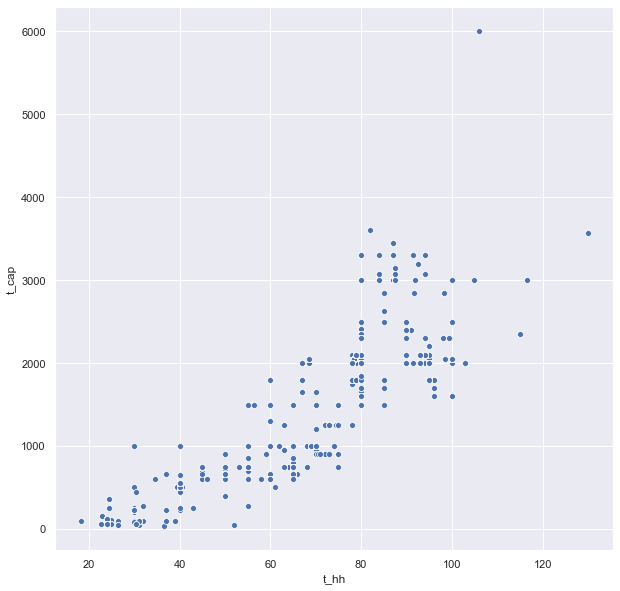

In [256]:
sns.scatterplot(x = "t_hh", y = "t_cap", data = wind_selections)

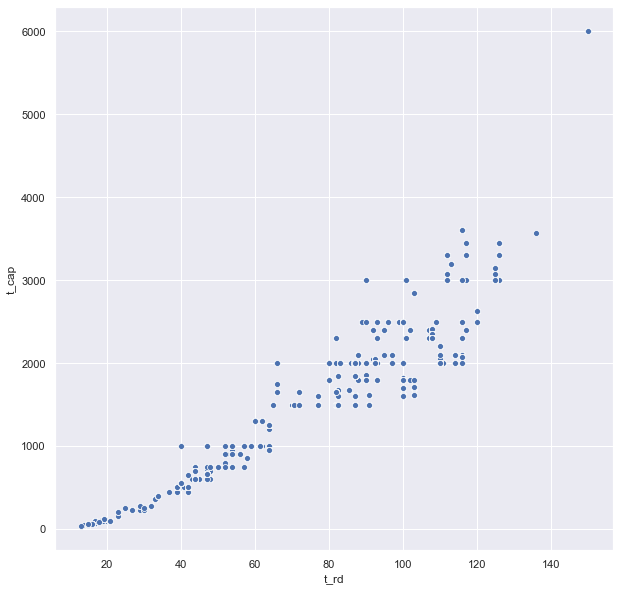

In [257]:
sns.scatterplot(x = "t_rd", y = "t_cap", data = wind_selections)

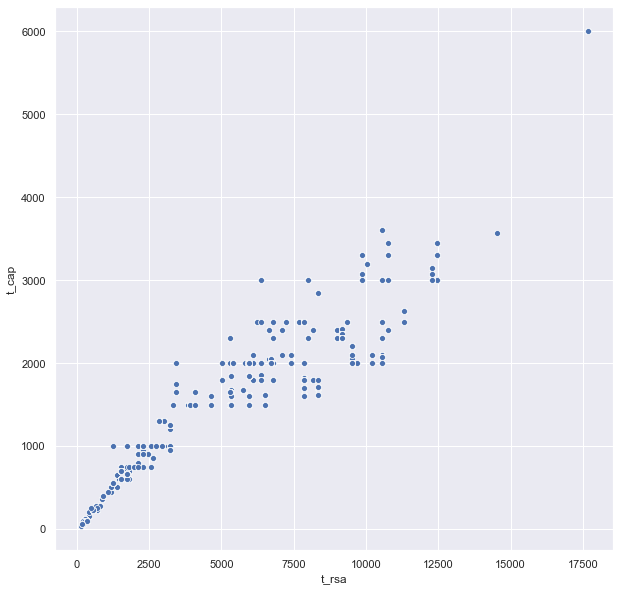

In [261]:
sns.scatterplot(x = "t_rsa", y = "t_cap", data = wind_selections)

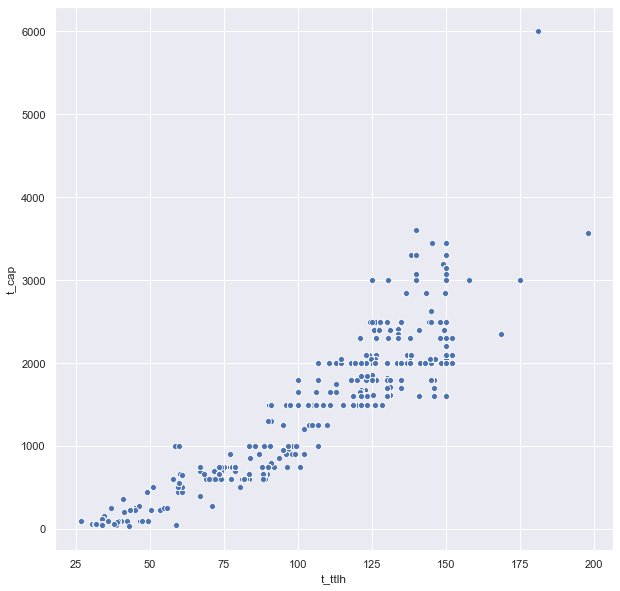

In [260]:
sns.scatterplot(x = "t_ttlh", y = "t_cap", data = wind_selections)

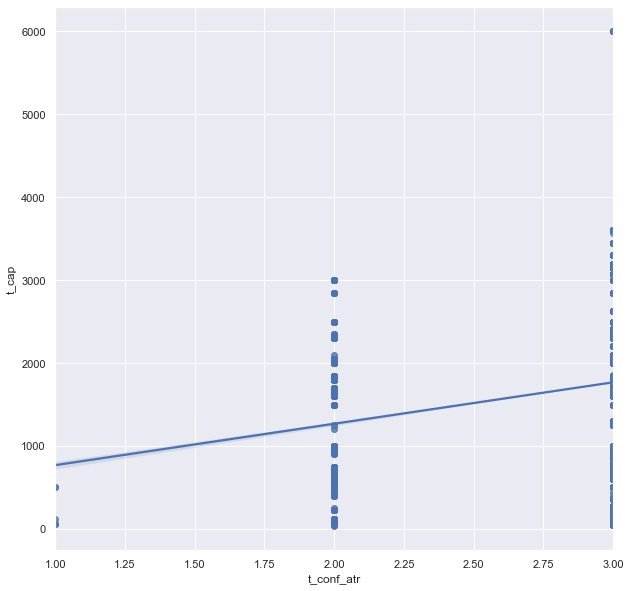

In [259]:
sns.regplot(x = "t_conf_atr", y = "t_cap", data = wind_selections)

#### Seems like all selected predictors are somewhat linear with out target variable

## Post transformation EDA

#### Standardize the dataset for a more linear relationship between the predictors and target variable

In [267]:
from sklearn.preprocessing import StandardScaler

def mass_standardization(df, col_names):
    scaler = StandardScaler()
    for col in col_names:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1)).flatten()
    return df

wind_standardized = mass_standardization(wind_selections.copy(), ["p_year", "t_cap", "t_hh", "t_rd", "t_rsa", "t_ttlh", "t_conf_atr"])
wind_standardized.head()

,t_cap,t_state,p_year,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr
190,2.13162,IA,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778
191,2.13162,IA,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778
192,2.13162,IA,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778
193,2.13162,IA,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778
194,2.13162,IA,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778


In [268]:
wind_standardized.describe()

,t_cap,p_year,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr
count,5.154800e+04,5.154800e+04,5.154800e+04,5.154800e+04,5.154800e+04,5.154800e+04,5.154800e+04
mean,1.399658e-14,1.498802e-14,-3.336060e-14,1.145545e-15,1.078089e-15,7.045639e-15,1.598680e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.873378e+00,-4.769285e+00,-4.596994e+00,-3.478310e+00,-2.364234e+00,-4.213417e+00,-8.316625e+00
25%,-4.046964e-01,-4.310913e-01,2.082879e-01,-4.206801e-01,-5.798107e-01,-7.479433e-02,2.467785e-01
50%,-6.652088e-02,6.946946e-02,2.082879e-01,5.707457e-02,-7.174764e-02,1.413688e-01,2.467785e-01
75%,6.098301e-01,7.368838e-01,2.082879e-01,6.781556e-01,6.813635e-01,4.611100e-01,2.467785e-01
max,7.204252e+00,1.404298e+00,4.096056e+00,3.066929e+00,4.553806e+00,3.505407e+00,2.467785e-01


#### Re-check linearity

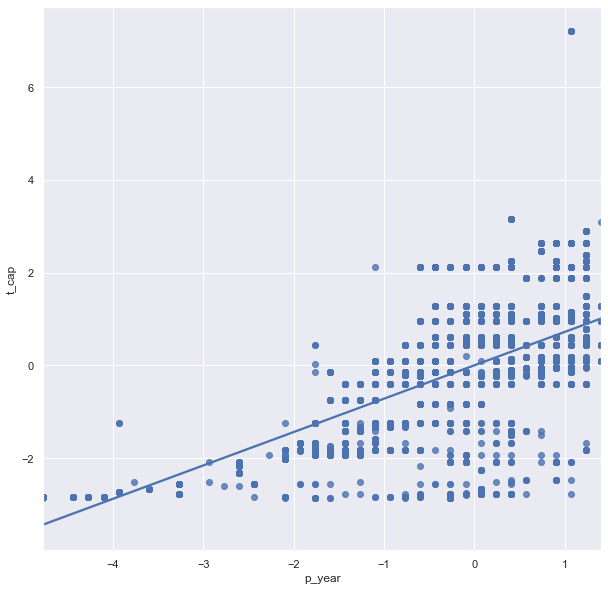

In [270]:
sns.regplot(x = "p_year", y = "t_cap", data = wind_standardized)

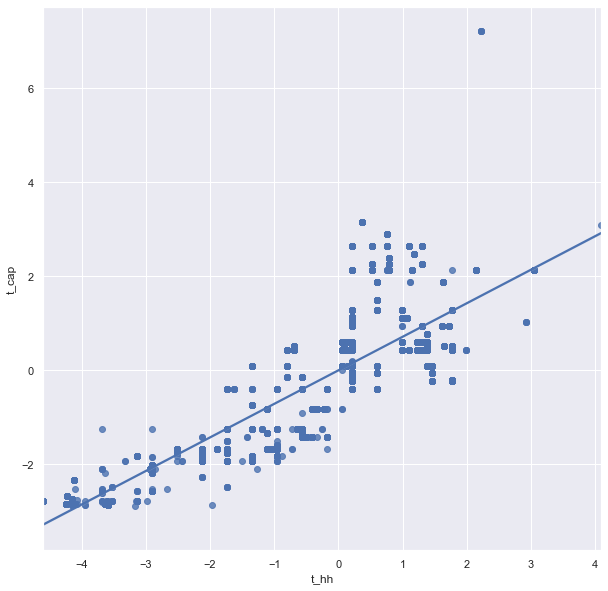

In [271]:
sns.regplot(x = "t_hh", y = "t_cap", data = wind_standardized)

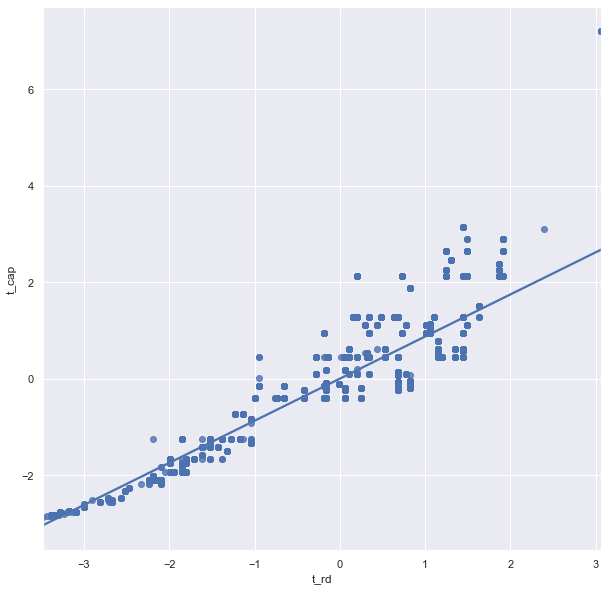

In [272]:
sns.regplot(x = "t_rd", y = "t_cap", data = wind_standardized)

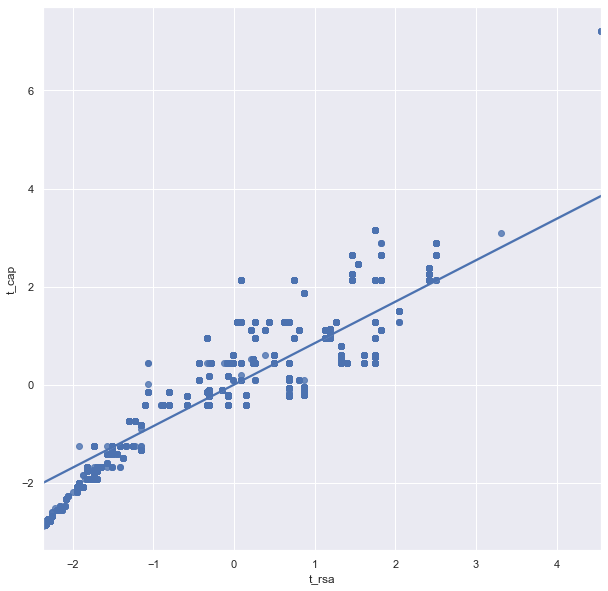

In [273]:
sns.regplot(x = "t_rsa", y = "t_cap", data = wind_standardized)

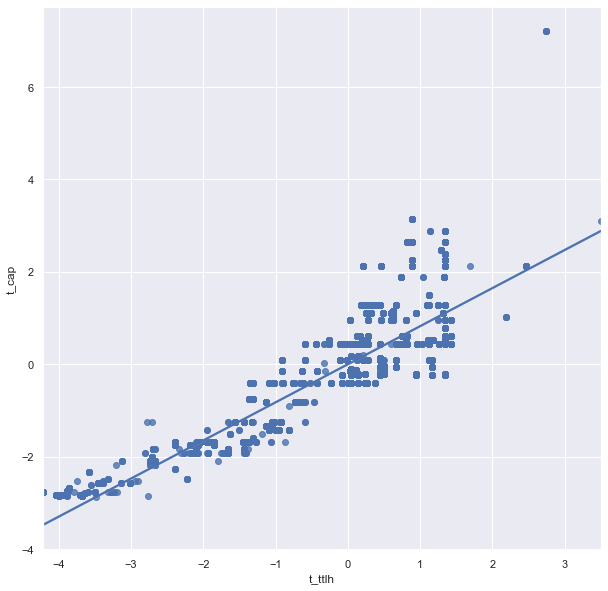

In [274]:
sns.regplot(x = "t_ttlh", y = "t_cap", data = wind_standardized)

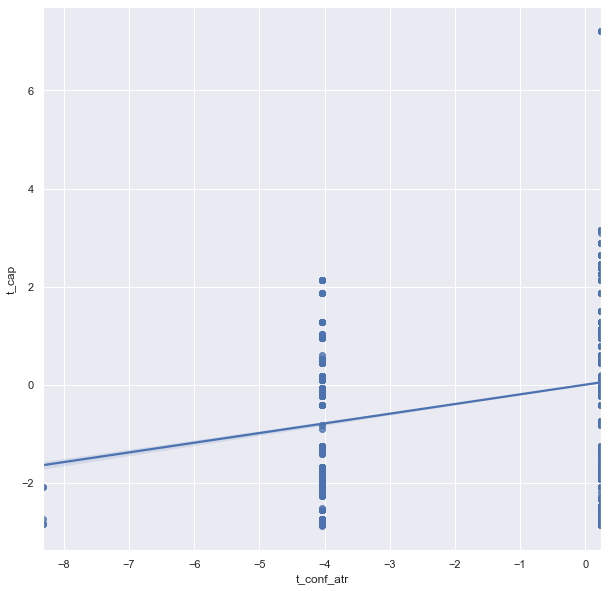

In [275]:
sns.regplot(x = "t_conf_atr", y = "t_cap", data = wind_standardized)

## Collinearity

#### Make a correlation heat map of the selected features

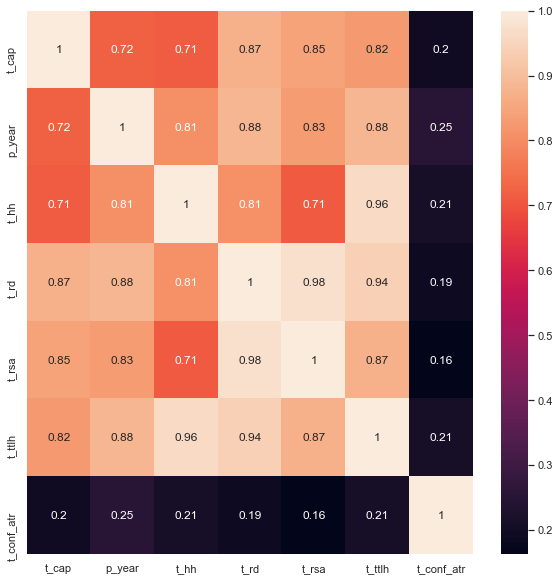

In [279]:
corr = wind_standardized.corr()
sns.heatmap(corr, annot=True)

#### It seems that most features are highly correlated with each other. This could possibly be bad but let's proceed with these factors for now since I assume that all of them seems to be good predictors of t_cap.

## Experiment
#### - Check if a feature with higher correlation with the target variable predicts better than a feature with a lower one.
### Conclusion
#### - It seems that features with higher correlation with our target variable predicts better than the lower one.

In [280]:
exp_corr = wind_standardized[["t_cap", "t_hh", "t_rsa"]].corr()
exp_corr

,t_cap,t_hh,t_rsa
t_cap,1.000000,0.712919,0.845721
t_hh,0.712919,1.000000,0.711468
t_rsa,0.845721,0.711468,1.000000


In [141]:
import statsmodels.api as sm

y = wind_standardized["t_cap"]
x1 = sm.add_constant(wind_standardized["t_hh"])
x2 = sm.add_constant(wind_standardized["t_rsa"])

sm.OLS(y, x1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 5.328e+04
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:41:33   Log-Likelihood:                -54849.
No. Observations:               51548   AIC:                         1.097e+05
Df Residuals:                   51546   BIC:                         1.097e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.563e-16      0.003   2.45e-13      1.000      -0.006       0.006
t_hh           0.7129      0.003    230.816      0.000       0.707       0.719
==============================================================================
Omnibus:                     5170.322   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7169.696
Skew:                           0.808   Prob(JB):                         0.00
Kurtosis:                       3.853   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
sm.OLS(y, x2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:                -40768.
No. Observations:               51548   AIC:                         8.154e+04
Df Residuals:                   51546   BIC:                         8.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.563e-16      0.002   3.22e-13      1.000      -0.005       0.005
t_rsa          0.8457      0.002    359.823      0.000       0.841       0.850
==============================================================================
Omnibus:                     7544.388   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16604.868
Skew:                           0.872   Prob(JB):                         0.00
Kurtosis:                       5.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Create the Model

In [283]:
y = wind_standardized["t_cap"]
# Transform the categorical variables into Dummy Encoded columns
wind_dummified = pd.get_dummies(wind_standardized)
wind_dummified

,t_cap,p_year,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_state_AK,t_state_AZ,t_state_CA,t_state_CO,t_state_CT,t_state_DE,t_state_GU,t_state_HI,t_state_IA,t_state_ID,t_state_IL,t_state_IN,t_state_KS,t_state_MA,t_state_MD,t_state_ME,t_state_MI,t_state_MN,t_state_MO,t_state_MT,t_state_NC,t_state_ND,t_state_NE,t_state_NH,t_state_NJ,t_state_NM,t_state_NV,t_state_NY,t_state_OH,t_state_OK,t_state_OR,t_state_PA,t_state_PR,t_state_RI,t_state_SD,t_state_TN,t_state_TX,t_state_UT,t_state_VT,t_state_WA,t_state_WI,t_state_WV,t_state_WY
190,2.131620,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
191,2.131620,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192,2.131620,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193,2.131620,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,2.131620,1.237445,0.791453,1.872542,2.423964,1.339273,0.246778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55167,-0.066521,0.903737,0.208288,0.678156,0.681364,0.443096,0.246778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
55168,-0.066521,0.903737,0.208288,0.678156,0.681364,0.443096,0.246778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
55368,-2.771925,1.070591,-3.135193,-3.096106,-2.279969,-3.276710,0.246778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55531,-2.831106,-1.098506,-3.640603,-3.382759,-2.346886,-3.704533,-8.316625,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [284]:
xs = sm.add_constant(wind_dummified.iloc[:, 1:])
final_model = sm.OLS(y, xs).fit()

In [285]:
final_model.summary()
# I'm not happy with the model even if we had a high R-squared values, since some coefficients doesn't make sense.
# Most coefficients numeric should be positive. Based on our EDAs as t_cap increases these coefficients also increase.
# This might be the effect of multicollinearity.
# We'll again model but this time with different sets of predictors.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     4891.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:51:59   Log-Likelihood:                -28931.
No. Observations:               51548   AIC:                         5.796e+04
Df Residuals:                   51499   BIC:                         5.839e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.016      9.414      0.000       0.123       0.188
p_year        -0.3201      0.005    -69.345      0.000      -0.329      -0.311
t_hh           5.1635      0.238     21.661      0.000       4.696       5.631
t_rd           5.6565      0.196     28.921      0.000       5.273       6.040
t_rsa         -0.3970      0.012    -32.015      0.000      -0.421      -0.373
t_ttlh        -8.7607      0.412    -21.273      0.000      -9.568      -7.954
t_conf_atr     0.0637      0.002     32.193      0.000       0.060       0.068
t_state_AK     0.8498      0.043     19.770      0.000       0.766       0.934
t_state_AZ    -0.0231      0.038     -0.603      0.547      -0.098       0.052
t_state_CA     0.2662      0.018     14.648      0.000       0.231       0.302
t_state_CO    -0.4023      0.019    -21.235      0.000      -0.439      -0.365
t_state_CT     1.0117      0.294      3.445      0.001       0.436       1.587
t_state_DE     0.0429      0.415      0.103      0.918      -0.770       0.856
t_state_GU     0.9296      0.415      2.239      0.025       0.116       1.744
t_state_HI     0.2596      0.042      6.251      0.000       0.178       0.341
t_state_IA    -0.1819      0.018    -10.261      0.000      -0.217      -0.147
t_state_ID    -0.2891      0.024    -11.889      0.000      -0.337      -0.241
t_state_IL    -0.2633      0.018    -14.260      0.000      -0.300      -0.227
t_state_IN    -0.3309      0.020    -16.214      0.000      -0.371      -0.291
t_state_KS    -0.3112      0.018    -17.017      0.000      -0.347      -0.275
t_state_MA     0.1089      0.048      2.256      0.024       0.014       0.203
t_state_MD     0.5882      0.050     11.745      0.000       0.490       0.686
t_state_ME     0.5485      0.027     20.423      0.000       0.496       0.601
t_state_MI    -0.6472      0.021    -30.731      0.000      -0.688      -0.606
t_state_MN    -0.1684      0.018     -9.110      0.000      -0.205      -0.132
t_state_MO    -0.4134      0.025    -16.648      0.000      -0.462      -0.365
t_state_MT    -0.1788      0.025     -7.099      0.000      -0.228      -0.129
t_state_NC    -0.8764      0.044    -19.871      0.000      -0.963      -0.790
t_state_ND    -0.1241      0.019     -6.380      0.000      -0.162      -0.086
t_state_NE    -0.4751      0.022    -21.393      0.000      -0.519      -0.432
t_state_NH     0.9869      0.051     19.486      0.000       0.888       1.086
t_state_NJ    -0.3221      0.170     -1.894      0.058      -0.655       0.011
t_state_NM    -0.2502      0.021    -11.870      0.000      -0.291      -0.209
t_state_NV     0.0593      0.054      1.104      0.270      -0.046       0.165
t_state_NY    -0.1864      0.021     -8.901      0.000      -0.227      -0.145
t_state_OH    -0.2704      0.029     -9.477      0.000      -0.326      -0.214
t_

In [309]:
set1 = ["t_cap", "t_state", "p_year", "t_rsa", "t_ttlh"] 
set2 = ["t_cap", "t_state", "t_hh", "t_rd"]
set3 = ["t_cap", "t_state", "p_year", "t_ttlh", "t_rsa"]
set4 = ["t_cap", "t_state", "t_ttlh", "t_rsa"]

In [310]:
y_set1 = wind_standardized["t_cap"]
# Transform the categorical variables into Dummy Encoded columns
wind_dummified_set1 = pd.get_dummies(wind_standardized[set1])
wind_dummified_set1


xs_set1 = sm.add_constant(wind_dummified_set1.iloc[:, 1:])
set1_model = sm.OLS(y_set1, xs_set1).fit()
set1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4411.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:26:14   Log-Likelihood:                -32427.
No. Observations:               51548   AIC:                         6.495e+04
Df Residuals:                   51502   BIC:                         6.535e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1084      0.018      6.147      0.000       0.074       0.143
p_year        -0.1976      0.005    -42.227      0.000      -0.207      -0.188
t_rsa          0.5172      0.005    111.275      0.000       0.508       0.526
t_ttlh         0.6278      0.006    108.510      0.000       0.616       0.639
t_state_AK     0.3149      0.045      6.955      0.000       0.226       0.404
t_state_AZ     0.0699      0.041      1.707      0.088      -0.010       0.150
t_state_CA     0.2638      0.019     13.580      0.000       0.226       0.302
t_state_CO    -0.3257      0.020    -16.083      0.000      -0.365      -0.286
t_state_CT     0.8468      0.314      2.695      0.007       0.231       1.463
t_state_DE     0.2179      0.444      0.491      0.624      -0.652       1.088
t_state_GU     0.1057      0.444      0.238      0.812      -0.765       0.976
t_state_HI     0.4094      0.044      9.228      0.000       0.322       0.496
t_state_IA    -0.1111      0.019     -5.862      0.000      -0.148      -0.074
t_state_ID    -0.1970      0.026     -7.577      0.000      -0.248      -0.146
t_state_IL    -0.3036      0.020    -15.378      0.000      -0.342      -0.265
t_state_IN    -0.3384      0.022    -15.498      0.000      -0.381      -0.296
t_state_KS    -0.2439      0.020    -12.482      0.000      -0.282      -0.206
t_state_MA     0.0909      0.052      1.760      0.078      -0.010       0.192
t_state_MD     0.5951      0.054     11.107      0.000       0.490       0.700
t_state_ME     0.5153      0.029     17.937      0.000       0.459       0.572
t_state_MI    -0.7486      0.022    -33.306      0.000      -0.793      -0.705
t_state_MN    -0.1158      0.020     -5.857      0.000      -0.155      -0.077
t_state_MO    -0.4694      0.027    -17.673      0.000      -0.521      -0.417
t_state_MT    -0.1765      0.027     -6.552      0.000      -0.229      -0.124
t_state_NC    -1.0964      0.047    -23.286      0.000      -1.189      -1.004
t_state_ND    -0.0785      0.021     -3.777      0.000      -0.119      -0.038
t_state_NE    -0.3765      0.024    -15.868      0.000      -0.423      -0.330
t_state_NH     1.0951      0.054     20.214      0.000       0.989       1.201
t_state_NJ    -0.2082      0.182     -1.144      0.253      -0.565       0.149
t_state_NM    -0.1396      0.023     -6.200      0.000      -0.184      -0.095
t_state_NV     0.2452      0.057      4.270      0.000       0.133       0.358
t_state_NY    -0.1441      0.022     -6.434      0.000      -0.188      -0.100
t_state_OH    -0.5355      0.030    -17.654      0.000      -0.595      -0.476
t_state_OK    -0.0933      0.019     -4.878      0.000      -0.131      -0.056
t_state_OR     0.1268      0.020      6.209      0.000       0.087       0.167
t_state_PA     0.0505      0.024      2.092      0.036       0.003       0.098
t_

In [311]:
y_set2 = wind_standardized["t_cap"]
# Transform the categorical variables into Dummy Encoded columns
wind_dummified_set2 = pd.get_dummies(wind_standardized[set2])
wind_dummified_set2

xs_set2 = sm.add_constant(wind_dummified_set2.iloc[:, 1:])
set2_model = sm.OLS(y_set2, xs_set2).fit()
set2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     4653.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:26:14   Log-Likelihood:                -31792.
No. Observations:               51548   AIC:                         6.367e+04
Df Residuals:                   51503   BIC:                         6.407e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1023      0.017      5.878      0.000       0.068       0.136
t_hh           0.1044      0.004     26.728      0.000       0.097       0.112
t_rd           0.8533      0.004    234.371      0.000       0.846       0.860
t_state_AK     0.1307      0.044      2.978      0.003       0.045       0.217
t_state_AZ     0.0090      0.040      0.222      0.825      -0.070       0.088
t_state_CA     0.3050      0.019     15.940      0.000       0.267       0.342
t_state_CO    -0.3348      0.020    -16.746      0.000      -0.374      -0.296
t_state_CT     0.9580      0.310      3.087      0.002       0.350       1.566
t_state_DE     0.1619      0.439      0.369      0.712      -0.698       1.022
t_state_GU    -0.2037      0.439     -0.464      0.642      -1.063       0.656
t_state_HI     0.2470      0.044      5.638      0.000       0.161       0.333
t_state_IA    -0.0802      0.019     -4.294      0.000      -0.117      -0.044
t_state_ID    -0.1889      0.026     -7.363      0.000      -0.239      -0.139
t_state_IL    -0.2500      0.019    -12.824      0.000      -0.288      -0.212
t_state_IN    -0.2703      0.022    -12.542      0.000      -0.313      -0.228
t_state_KS    -0.2836      0.019    -14.684      0.000      -0.321      -0.246
t_state_MA    -0.0905      0.051     -1.778      0.075      -0.190       0.009
t_state_MD     0.6771      0.053     12.797      0.000       0.573       0.781
t_state_ME     0.5858      0.028     20.649      0.000       0.530       0.641
t_state_MI    -0.5982      0.022    -26.982      0.000      -0.642      -0.555
t_state_MN    -0.1071      0.020     -5.490      0.000      -0.145      -0.069
t_state_MO    -0.3838      0.026    -14.641      0.000      -0.435      -0.332
t_state_MT    -0.1922      0.027     -7.229      0.000      -0.244      -0.140
t_state_NC    -0.9382      0.046    -20.191      0.000      -1.029      -0.847
t_state_ND    -0.0936      0.021     -4.556      0.000      -0.134      -0.053
t_state_NE    -0.4650      0.023    -19.826      0.000      -0.511      -0.419
t_state_NH     1.0133      0.054     18.935      0.000       0.908       1.118
t_state_NJ    -0.1495      0.180     -0.832      0.406      -0.502       0.203
t_state_NM    -0.2075      0.022     -9.324      0.000      -0.251      -0.164
t_state_NV     0.2045      0.057      3.605      0.000       0.093       0.316
t_state_NY    -0.0734      0.022     -3.325      0.001      -0.117      -0.030
t_state_OH    -0.3162      0.030    -10.532      0.000      -0.375      -0.257
t_state_OK    -0.1326      0.019     -7.015      0.000      -0.170      -0.096
t_state_OR     0.1251      0.020      6.211      0.000       0.086       0.165
t_state_PA     0.1286      0.024      5.399      0.000       0.082       0.175
t_state_PR    -0.1995      0.059     -3.367      0.001      -0.316      -0.083
t_

In [312]:
y_set3 = wind_standardized["t_cap"]
# Transform the categorical variables into Dummy Encoded columns
wind_dummified_set3 = pd.get_dummies(wind_standardized[set3])
wind_dummified_set3

xs_set3 = sm.add_constant(wind_dummified_set3.iloc[:, 1:])
set3_model = sm.OLS(y_set3, xs_set3).fit()
set3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4411.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:26:14   Log-Likelihood:                -32427.
No. Observations:               51548   AIC:                         6.495e+04
Df Residuals:                   51502   BIC:                         6.535e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1084      0.018      6.147      0.000       0.074       0.143
p_year        -0.1976      0.005    -42.227      0.000      -0.207      -0.188
t_ttlh         0.6278      0.006    108.510      0.000       0.616       0.639
t_rsa          0.5172      0.005    111.275      0.000       0.508       0.526
t_state_AK     0.3149      0.045      6.955      0.000       0.226       0.404
t_state_AZ     0.0699      0.041      1.707      0.088      -0.010       0.150
t_state_CA     0.2638      0.019     13.580      0.000       0.226       0.302
t_state_CO    -0.3257      0.020    -16.083      0.000      -0.365      -0.286
t_state_CT     0.8468      0.314      2.695      0.007       0.231       1.463
t_state_DE     0.2179      0.444      0.491      0.624      -0.652       1.088
t_state_GU     0.1057      0.444      0.238      0.812      -0.765       0.976
t_state_HI     0.4094      0.044      9.228      0.000       0.322       0.496
t_state_IA    -0.1111      0.019     -5.862      0.000      -0.148      -0.074
t_state_ID    -0.1970      0.026     -7.577      0.000      -0.248      -0.146
t_state_IL    -0.3036      0.020    -15.378      0.000      -0.342      -0.265
t_state_IN    -0.3384      0.022    -15.498      0.000      -0.381      -0.296
t_state_KS    -0.2439      0.020    -12.482      0.000      -0.282      -0.206
t_state_MA     0.0909      0.052      1.760      0.078      -0.010       0.192
t_state_MD     0.5951      0.054     11.107      0.000       0.490       0.700
t_state_ME     0.5153      0.029     17.937      0.000       0.459       0.572
t_state_MI    -0.7486      0.022    -33.306      0.000      -0.793      -0.705
t_state_MN    -0.1158      0.020     -5.857      0.000      -0.155      -0.077
t_state_MO    -0.4694      0.027    -17.673      0.000      -0.521      -0.417
t_state_MT    -0.1765      0.027     -6.552      0.000      -0.229      -0.124
t_state_NC    -1.0964      0.047    -23.286      0.000      -1.189      -1.004
t_state_ND    -0.0785      0.021     -3.777      0.000      -0.119      -0.038
t_state_NE    -0.3765      0.024    -15.868      0.000      -0.423      -0.330
t_state_NH     1.0951      0.054     20.214      0.000       0.989       1.201
t_state_NJ    -0.2082      0.182     -1.144      0.253      -0.565       0.149
t_state_NM    -0.1396      0.023     -6.200      0.000      -0.184      -0.095
t_state_NV     0.2452      0.057      4.270      0.000       0.133       0.358
t_state_NY    -0.1441      0.022     -6.434      0.000      -0.188      -0.100
t_state_OH    -0.5355      0.030    -17.654      0.000      -0.595      -0.476
t_state_OK    -0.0933      0.019     -4.878      0.000      -0.131      -0.056
t_state_OR     0.1268      0.020      6.209      0.000       0.087       0.167
t_state_PA     0.0505      0.024      2.092      0.036       0.003       0.098
t_

In [313]:
y_set4 = wind_standardized["t_cap"]
# Transform the categorical variables into Dummy Encoded columns
wind_dummified_set4 = pd.get_dummies(wind_standardized[set4])
wind_dummified_set4

xs_set4 = sm.add_constant(wind_dummified_set4.iloc[:, 1:])
set4_model = sm.OLS(y_set4, xs_set4).fit()
set4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     4321.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:26:14   Log-Likelihood:                -33304.
No. Observations:               51548   AIC:                         6.670e+04
Df Residuals:                   51503   BIC:                         6.710e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0825      0.018      4.606      0.000       0.047       0.118
t_ttlh         0.4936      0.005    100.375      0.000       0.484       0.503
t_rsa          0.4715      0.005    102.550      0.000       0.463       0.481
t_state_AK    -0.0320      0.045     -0.706      0.480      -0.121       0.057
t_state_AZ     0.0606      0.042      1.454      0.146      -0.021       0.142
t_state_CA     0.3151      0.020     15.977      0.000       0.276       0.354
t_state_CO    -0.3102      0.021    -15.063      0.000      -0.351      -0.270
t_state_CT     0.8731      0.320      2.732      0.006       0.247       1.500
t_state_DE     0.2514      0.452      0.557      0.578      -0.634       1.137
t_state_GU    -0.4737      0.452     -1.049      0.294      -1.359       0.412
t_state_HI     0.3493      0.045      7.745      0.000       0.261       0.438
t_state_IA    -0.0617      0.019     -3.206      0.001      -0.099      -0.024
t_state_ID    -0.1578      0.026     -5.971      0.000      -0.210      -0.106
t_state_IL    -0.2744      0.020    -13.669      0.000      -0.314      -0.235
t_state_IN    -0.2958      0.022    -13.330      0.000      -0.339      -0.252
t_state_KS    -0.2436      0.020    -12.253      0.000      -0.283      -0.205
t_state_MA    -0.0498      0.052     -0.949      0.343      -0.153       0.053
t_state_MD     0.6490      0.054     11.911      0.000       0.542       0.756
t_state_ME     0.5512      0.029     18.871      0.000       0.494       0.608
t_state_MI    -0.6813      0.023    -29.877      0.000      -0.726      -0.637
t_state_MN    -0.0915      0.020     -4.551      0.000      -0.131      -0.052
t_state_MO    -0.4250      0.027    -15.745      0.000      -0.478      -0.372
t_state_MT    -0.1907      0.027     -6.959      0.000      -0.244      -0.137
t_state_NC    -1.0618      0.048    -22.174      0.000      -1.156      -0.968
t_state_ND    -0.0684      0.021     -3.232      0.001      -0.110      -0.027
t_state_NE    -0.3994      0.024    -16.555      0.000      -0.447      -0.352
t_state_NH     1.0759      0.055     19.524      0.000       0.968       1.184
t_state_NJ    -0.1214      0.185     -0.656      0.512      -0.484       0.241
t_state_NM    -0.1499      0.023     -6.547      0.000      -0.195      -0.105
t_state_NV     0.2872      0.058      4.918      0.000       0.173       0.402
t_state_NY    -0.0782      0.023     -3.443      0.001      -0.123      -0.034
t_state_OH    -0.4773      0.031    -15.487      0.000      -0.538      -0.417
t_state_OK    -0.0882      0.019     -4.537      0.000      -0.126      -0.050
t_state_OR     0.1649      0.021      7.946      0.000       0.124       0.206
t_state_PA     0.1131      0.025      4.613      0.000       0.065       0.161
t_state_PR    -0.1411      0.061     -2.313      0.021      -0.261      -0.022
t_

#### Sems like set 2 is the best model amongst all and p_year is not a good feature to since its coefficient on the model is always negative eventhough it's relationship with t_cap is positive. Aside from state location it seems like Turbine Hub Height (t_hh) and Turbine Rotor Diameter (t_rd) age good features that describes Turbine Capacity (t_cap).

In [324]:
set2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     4653.
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:34:09   Log-Likelihood:                -31792.
No. Observations:               51548   AIC:                         6.367e+04
Df Residuals:                   51503   BIC:                         6.407e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1023      0.017      5.878      0.000       0.068       0.136
t_hh           0.1044      0.004     26.728      0.000       0.097       0.112
t_rd           0.8533      0.004    234.371      0.000       0.846       0.860
t_state_AK     0.1307      0.044      2.978      0.003       0.045       0.217
t_state_AZ     0.0090      0.040      0.222      0.825      -0.070       0.088
t_state_CA     0.3050      0.019     15.940      0.000       0.267       0.342
t_state_CO    -0.3348      0.020    -16.746      0.000      -0.374      -0.296
t_state_CT     0.9580      0.310      3.087      0.002       0.350       1.566
t_state_DE     0.1619      0.439      0.369      0.712      -0.698       1.022
t_state_GU    -0.2037      0.439     -0.464      0.642      -1.063       0.656
t_state_HI     0.2470      0.044      5.638      0.000       0.161       0.333
t_state_IA    -0.0802      0.019     -4.294      0.000      -0.117      -0.044
t_state_ID    -0.1889      0.026     -7.363      0.000      -0.239      -0.139
t_state_IL    -0.2500      0.019    -12.824      0.000      -0.288      -0.212
t_state_IN    -0.2703      0.022    -12.542      0.000      -0.313      -0.228
t_state_KS    -0.2836      0.019    -14.684      0.000      -0.321      -0.246
t_state_MA    -0.0905      0.051     -1.778      0.075      -0.190       0.009
t_state_MD     0.6771      0.053     12.797      0.000       0.573       0.781
t_state_ME     0.5858      0.028     20.649      0.000       0.530       0.641
t_state_MI    -0.5982      0.022    -26.982      0.000      -0.642      -0.555
t_state_MN    -0.1071      0.020     -5.490      0.000      -0.145      -0.069
t_state_MO    -0.3838      0.026    -14.641      0.000      -0.435      -0.332
t_state_MT    -0.1922      0.027     -7.229      0.000      -0.244      -0.140
t_state_NC    -0.9382      0.046    -20.191      0.000      -1.029      -0.847
t_state_ND    -0.0936      0.021     -4.556      0.000      -0.134      -0.053
t_state_NE    -0.4650      0.023    -19.826      0.000      -0.511      -0.419
t_state_NH     1.0133      0.054     18.935      0.000       0.908       1.118
t_state_NJ    -0.1495      0.180     -0.832      0.406      -0.502       0.203
t_state_NM    -0.2075      0.022     -9.324      0.000      -0.251      -0.164
t_state_NV     0.2045      0.057      3.605      0.000       0.093       0.316
t_state_NY    -0.0734      0.022     -3.325      0.001      -0.117      -0.030
t_state_OH    -0.3162      0.030    -10.532      0.000      -0.375      -0.257
t_state_OK    -0.1326      0.019     -7.015      0.000      -0.170      -0.096
t_state_OR     0.1251      0.020      6.211      0.000       0.086       0.165
t_state_PA     0.1286      0.024      5.399      0.000       0.082       0.175
t_state_PR    -0.1995      0.059     -3.367      0.001      -0.316      -0.083
t_

In [318]:
set2_model.fittedvalues

190      1.702533
191      1.702533
192      1.702533
193      1.702533
194      1.702533
           ...   
55167    0.551577
55168    0.551577
55368   -2.940194
55531   -3.033483
55532   -3.033483
Length: 51548, dtype: float64

#### RMSE

In [319]:
np.sqrt(np.mean(set2_model.resid.values**2))

0.4483416353744215

#### Variance

In [321]:
np.std(wind_standardized["t_cap"].values)

1.0

In [323]:
set2

['t_cap', 't_state', 't_hh', 't_rd']

### We had a lower RMSE than variance which is good since the model's uncertainty is less than the variance.

# No Endogeneity

In [325]:
print("Correlation Between the errors and the target variable:\n", np.corrcoef(wind_standardized["t_cap"], set2_model.resid.values))

Correlation Between the errors and the target variable:
 [[1.         0.44834164]
 [0.44834164 1.        ]]


### The correlation seems acceptable let's double check using a graph.

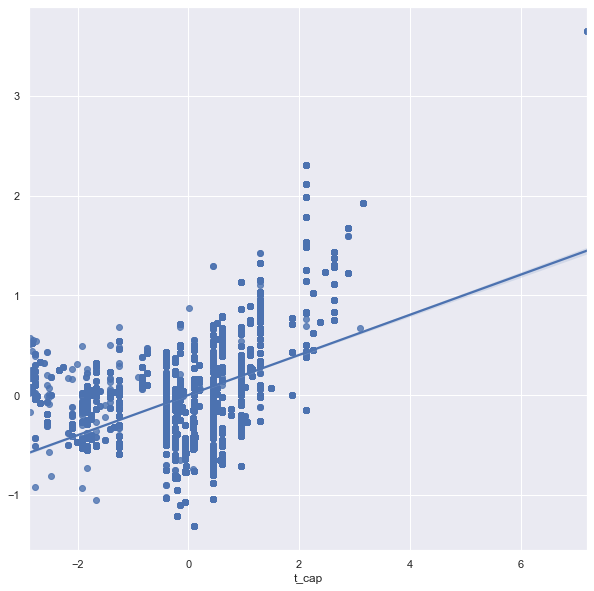

In [326]:
sns.regplot(wind_standardized["t_cap"], set2_model.resid.values)

### Based on the graph the errors are quite random and it seems that the correlation is acceptable

# Normality of Residuals and Heteroscedasticity


In [327]:
print("Heteroscedasticity:")
print("Target variable variance vs residual variance:")
print(np.var(wind_standardized["t_cap"]), np.var(set2_model.resid.values))

Heteroscedasticity:
Target variable variance vs residual variance:
1.0000000000000826 0.2010102220102107


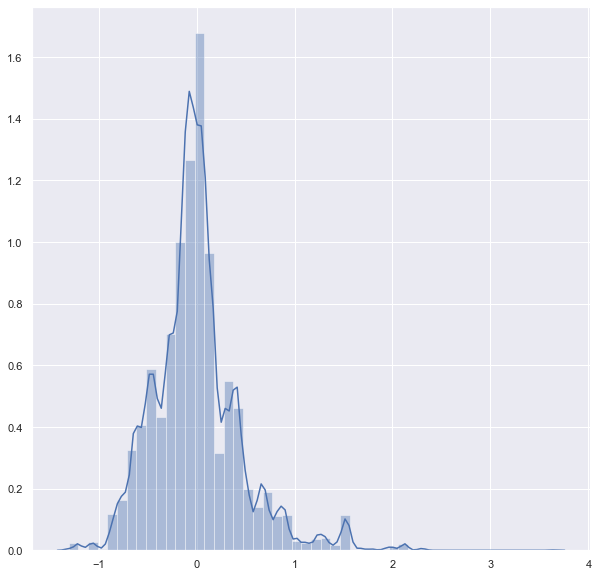

In [329]:
sns.distplot(set2_model.resid.values)

#### Whilst we don't have a (perfect) normal distribution of the errors this is acceptable enough

## Autocorrelation

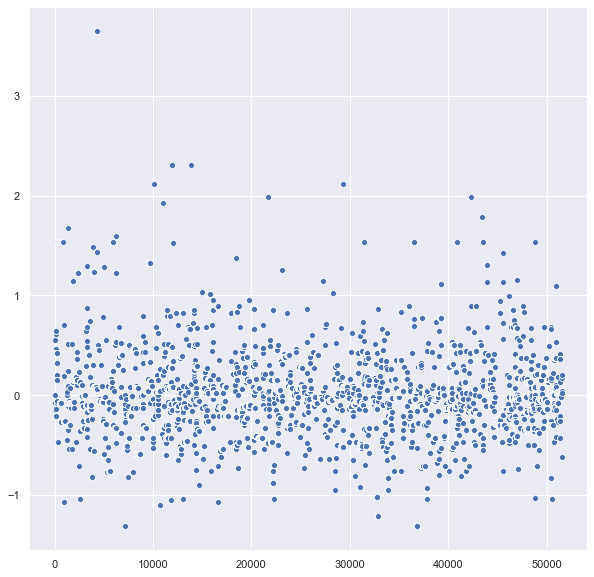

In [332]:
sns.scatterplot(range(0, len(set2_model.resid.values)), set2_model.resid.values)

#### Our errors aren't as random as we've wanted it to be. Maybe because we've Standardized the dataset. And since autocorrelation is hard to minimize in a cross-sectional dataset we'll just have to accept this result

#### **Insights: It seems like our errors isn't as normal as we've wanted it to be. This might be a violation of the Linear Model assumptions**